In [4]:
import pandas as pd 
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)
print(data)

     PassengerId  Survived  Pclass  \
0            343         0       2   
1             76         0       3   
2            641         0       3   
3            568         0       3   
4            672         0       1   
..           ...       ...     ...   
886           10         1       2   
887           61         0       3   
888          535         0       3   
889          102         0       3   
890          428         1       2   

                                                  Name  Sex        Age  SibSp  \
0                           Collander, Mr. Erik Gustaf    1  28.000000      0   
1                              Moen, Mr. Sigurd Hansen    1  25.000000      0   
2                               Jensen, Mr. Hans Peder    1  20.000000      0   
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)    0  29.000000      0   
4                               Davidson, Mr. Thornton    1  31.000000      1   
..                                                 ...  .

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing, tree    
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
tre = tree.DecisionTreeClassifier(criterion="gini",max_leaf_nodes=10)  
tre.fit(x_train, y_train)   #fitting our model
y_pred=tre.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8100558659217877


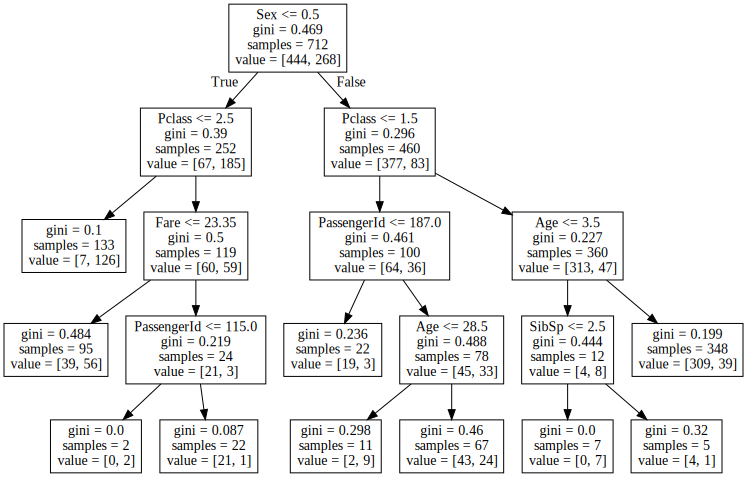

In [16]:
import graphviz
dot_data=tree.export_graphviz(tre,out_file=None,feature_names=x.columns)
graph=graphviz.Source(dot_data)
graph.render("data")
graph

Our model can therefore be summarised with 4 simple rules:

If our observation includes de "Mr" Title, then we classify it as not survived (all the branches in the left side of the tree lead to an orange node)
If it doesn't include "Mr" Title, and FamilySize is 4 or less, then we classify it as survived.
If it doesn't include "Mr" Title, FamilySize is more than 4 and Pclass is 2 or less, then we classify it as survived.
If it doesn't include "Mr" Title, FamilySize is more than 4 and Pclass is more than 2, then we classify it as not survived.
Thanks to these rules we can infer some insights about the shipwreck. "Misters" seem to have honoured their title and sacrificed themselves in favour on women and men with more exotic titles like "Master" or "Dr". We can also note that smaller families had better chances to survive, maybe because bigger families tried to stick together or look for missing members and therefore didn't had places left in the lifeboats. Finally, we can observe that 3rd class passengers had also less chances to survive so probably passengers belonging to upper social social classes were privileged, or simply 3rd class cabins may have been further away of the lifeboats.


previous accuracy=0,78
new accuracy=0,81
we can see that when we change these two parameters the accuracy change and grows

In [19]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8324022346368715


In [20]:
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
clf=RandomForestClassifier(n_estimators=16)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8435754189944135


when we replace 10 by 16 the accuracy goes from 0,83 to 0,84
  